In [50]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, num_strategies):
        # Инициализация всех стратегий с равной вероятностью
        self.strategy_probabilities = np.ones(num_strategies) / num_strategies
        self.average_payoff_history = np.zeros(num_strategies)

    def choose_strategy(self):
        # Выбор стратегии на основе распределения вероятностей
        return np.random.choice(len(self.strategy_probabilities), \
                                p=self.strategy_probabilities)

    def update_strategy(self, strategy, payoff):
        # Обновление истории средних выигрышей
        self.average_payoff_history[strategy] += \
            payoff / (np.sum(self.strategy_probabilities) + 1)
        # Обновление вероятностей стратегий на основе средних выигрышей
        exp_payoffs = np.exp(self.average_payoff_history)
        self.strategy_probabilities = exp_payoffs / np.sum(exp_payoffs)

In [51]:
class Game:
    def __init__(self, payoff_matrix):
        self.payoff_matrix = payoff_matrix
        self.agent1 = Agent(payoff_matrix.shape[0])
        self.agent2 = Agent(payoff_matrix.shape[1])

    def play_round(self):
        # Оба агента выбирают стратегию
        strategy1 = self.agent1.choose_strategy()
        strategy2 = self.agent2.choose_strategy()

        # Вычисление выигрышей
        payoff1 = self.payoff_matrix[strategy1, strategy2]
        # Обратите внимание: выигрыш агента 2 противоположен агенту 1
        payoff2 = -payoff1

        # Обновление стратегий на основе выигрышей
        self.agent1.update_strategy(strategy1, payoff1)
        self.agent2.update_strategy(strategy2, payoff2)

        return [strategy1, strategy2, \
                payoff1, payoff2, \
                self.agent1.strategy_probabilities, self.agent2.strategy_probabilities]



In [60]:
# Матрицы выигрышей
payoff_matrix = np.array([
    [1, -1],
    [-1, 1]
])

# Инициализация игры и игровой симуляции
game = Game(payoff_matrix)

round_number = 100

In [61]:
result = []
for _ in range(round_number):
    result.append(game.play_round())

In [62]:
first_agent_result = []
second_agent_result = []
for res in result:
    if(len(first_agent_result)>0):
        first_agent_result.append(res[2] + first_agent_result[len(first_agent_result)-1])
    else:
        first_agent_result.append(res[2])
    if(len(second_agent_result)>0):
        second_agent_result.append(res[3] + second_agent_result[len(second_agent_result)-1])
    else:
        second_agent_result.append(res[3])

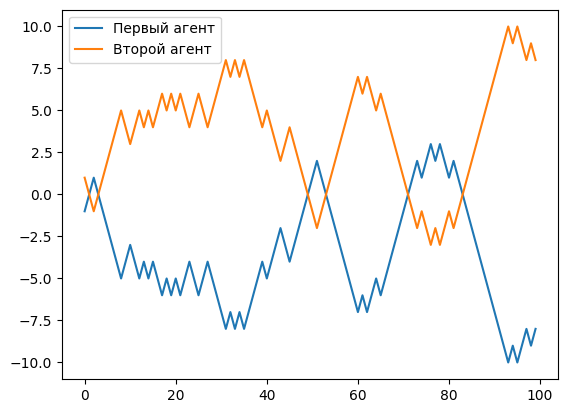

In [63]:
plt.title('Выигрышь агента')
plt.plot(first_agent_result, label = 'Первый агент')
plt.plot(second_agent_result, label = 'Второй агент')
plt.legend()

In [64]:
first_agent_strategy1_result = []
first_agent_strategy2_result = []
for res in result:
        first_agent_strategy1_result.append(res[4][0])
        first_agent_strategy2_result.append(res[4][1])

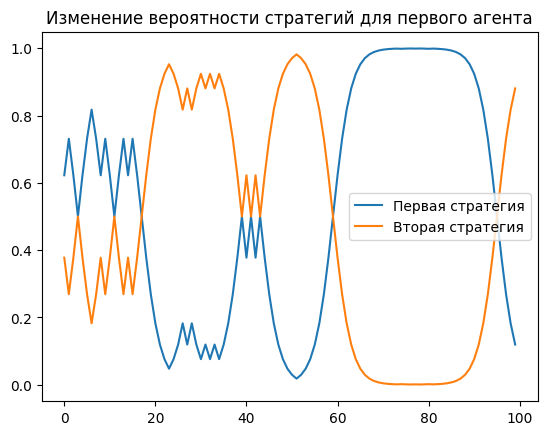

In [65]:
plt.plot(first_agent_strategy1_result, label = 'Первая стратегия')
plt.plot(first_agent_strategy2_result, label = 'Вторая стратегия')
plt.title("Изменение вероятности стратегий для первого агента")
plt.legend()

Камень-ножницы-бумага

In [100]:
# Матрицы выигрышей
payoff_matrix = np.array([
    [0, 1, -1],
    [-1, 0, 1],
    [1, -1, 0]
])

# Инициализация игры и игровой симуляции
game = Game(payoff_matrix)

round_number = 1000

In [101]:
result = []
for _ in range(round_number):
    result.append(game.play_round())

In [102]:
first_agent_result = []
second_agent_result = []
for res in result:
    if(len(first_agent_result)>0):
        first_agent_result.append(res[2] + first_agent_result[len(first_agent_result)-1])
    else:
        first_agent_result.append(res[2])
    if(len(second_agent_result)>0):
        second_agent_result.append(res[3] + second_agent_result[len(second_agent_result)-1])
    else:
        second_agent_result.append(res[3])

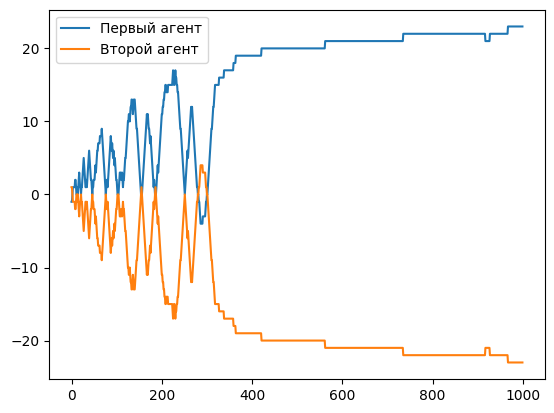

In [103]:
plt.plot(first_agent_result, label = 'Первый агент')
plt.plot(second_agent_result, label = 'Второй агент')
plt.legend()

In [104]:
first_agent_strategy1_result = []
first_agent_strategy2_result = []
first_agent_strategy3_result = []
for res in result:
        first_agent_strategy1_result.append(res[4][0])
        first_agent_strategy2_result.append(res[4][1])
        first_agent_strategy3_result.append(res[4][2])

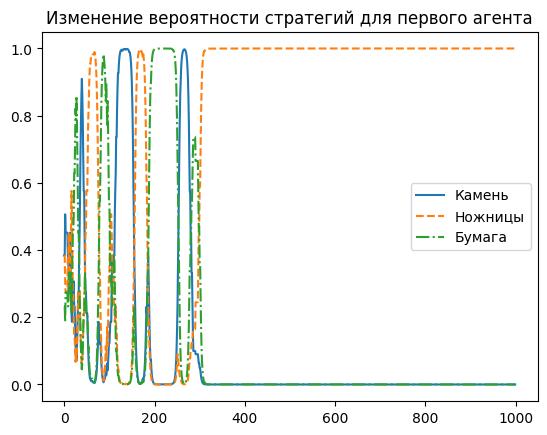

In [105]:
plt.plot(first_agent_strategy1_result, label = 'Камень')
plt.plot(first_agent_strategy2_result, '--', label = 'Ножницы')
plt.plot(first_agent_strategy3_result, '-.', label = 'Бумага')
plt.title("Изменение вероятности стратегий для первого агента")
plt.legend()

In [106]:
second_agent_strategy1_result = []
second_agent_strategy2_result = []
second_agent_strategy3_result = []
for res in result:
        second_agent_strategy1_result.append(res[5][0])
        second_agent_strategy2_result.append(res[5][1])
        second_agent_strategy3_result.append(res[5][2])

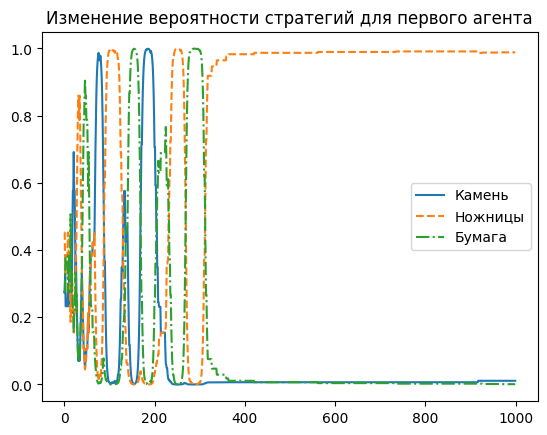

In [107]:
plt.plot(second_agent_strategy1_result, label = 'Камень')
plt.plot(second_agent_strategy2_result, '--', label = 'Ножницы')
plt.plot(second_agent_strategy3_result, '-.', label = 'Бумага')
plt.title("Изменение вероятности стратегий для второго агента")
plt.legend()